# Lab 5. Data Modeling - Part 3: Regression

In [ ]:
######################################################################

### Lab Assignment 5.8. Linear Regression

Advances in medicine, an increase in healthcare facilities, and improved standards of care have all contributed to an increased overall life expectancy over the last few decades. Although this might seem like great achievement for humanity, it has also led to the abandonment of more elderly people into senior-care and assisted living communities. The morality, benefits, and disadvantages of leaving one's parents in such facilities are still debatable; however, the fact that this practice has increased the financial burden on both the private-sector and government is not.

In this lab assignment, you will be using the subset a life expectancy dataset, provided courtesy of the Center for Disease Control and Prevention's [National Center for Health Statistics page](http://www.cdc.gov/nchs/data_access/ftp_data.htm). The page hosts [many open datasets](http://www.cdc.gov/nchs/hus/older.htm) on topics ranging from injuries, poverty, women's health, education, health insurance, and of course infectious diseases, and much more. But the one you'll be using is their "Life expectancy at birth, at age 65, and at age 75, by sex, race, and origin" data set, which has statistics dating back from the 1900's to current, taken within the United States. We have included a copy of the dataset as Module5/Datasets/<b>life_expectancy.csv</b>. The dataset only lists the life expectancy of whites and blacks, because throughout most of the collection period, those were the dominant two races that actively had their statistics recorded within the U.S.

Using linear regression, you will extrapolate how long people will live in the future. The private sector and governments mirror these calculations when computing social security payouts, taxes, infrastructure, and more. Fire up your Module5/<b>assignment8.py</b> starter code, and then complete the following:

1. Make sure the dataset has been properly loaded.
2. Create a linear model to use and re-use throughout the assignment. You can retrain the same model again, rather than re-creating a new instance of the class.
3. Slice out using indexing any records before 1986 into a brand new slice.
4. Have one slice for training and one for testing. First, map the life expectancy of white males as a function of age, or WhiteMales = f(age).
5. Fit your model, draw a regression line and scatter plot with the convenience function, and then print out the actual, observed 2015 White Male life expectancy value from the dataset.
6. Repeat for BlackFemale.
7. Print out and display a correlation matrix for the dataset's features.
8. Answer the questions below.

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%pylab inline
matplotlib.style.use('ggplot') # Look Pretty

Populating the interactive namespace from numpy and matplotlib


In [42]:
# TODO: Load up the data here into a variable called 'X'.
# As usual, do a .describe and a print of your dataset and
# compare it to the dataset loaded in a text file or in a
# spread sheet application
#
# .. your code here ..
X = pd.read_csv('Module5/Datasets/life_expectancy.csv', sep='\t')
X.head()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3


In [43]:
X.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


In [44]:
# TODO: Create your linear regression model here and store it in a
# variable called 'model'. Don't actually train or do anything else
# with it yet:
#
# .. your code here ..
from sklearn import linear_model
model = linear_model.LinearRegression()

In [65]:
# TODO: Slice out your data manually (e.g. don't use train_test_split,
# but actually do the Indexing yourself. Set X_train to be year values
# LESS than 1986, and y_train to be corresponding WhiteMale age values.
#
# INFO You might also want to read the note about slicing on the bottom
# of this document before proceeding.
#
# .. your code here ..
X_train = X.loc[ X.Year < 1986 , 'Year'] # X.Year[X.Year < 1986]
y_train = X.loc[ X.Year < 1986, 'WhiteMale']

In [66]:
print X_train.head()  # returned as a Series
print
print y_train.head()  # returned as a Series

0    1900
1    1950
2    1960
3    1970
4    1975
Name: Year, dtype: int64

0    46.6
1    66.5
2    67.4
3    68.0
4    69.5
Name: WhiteMale, dtype: float64


In [67]:
print len(X_train), len(y_train)
print X_train.dtype, y_train.dtype
print type(X_train), type(y_train)

11 11
int64 float64
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [68]:
# Convert the Series to DataFrame
X_train = X_train.to_frame()  
# X_train = X_train.reshape(-1,1) # <-- Same effect

In [69]:
# TODO: Train your model then pass it into drawLine with your training
# set and labels. You can title it "WhiteMale". drawLine will output
# to the console a 2014 extrapolation / approximation for what it
# believes the WhiteMale's life expectancy in the U.S. will be...
# given the pre-1986 data you trained it with. It'll also produce a
# 2030 and 2045 extrapolation.
#
# .. your code here ..
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
def drawLine(model, X_test, y_test, title):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression line,
    # and displaying the R2 coefficient
    fig = plt.figure(figsize(8,8))
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print "Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0]
    print "Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0]
    print "Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0]

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

Est 2014 WhiteMale Life Expectancy:  80.8563542562
Est 2030 WhiteMale Life Expectancy:  85.3934938378
Est 2045 WhiteMale Life Expectancy:  89.6470621955


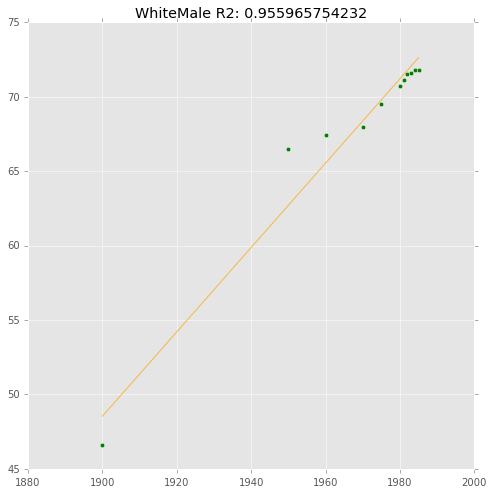

In [71]:
drawLine(model, X_train, y_train, "WhiteMale")

In [52]:
# TODO: Print the actual 2014 WhiteMale life expectancy from your
# loaded dataset
#
# .. your code here ..
print "Observed value (WhiteMale): ", X.loc[ X.Year == 2014, 'WhiteMale'].values[0]
print "Expected value (WhiteMale): ", model.predict(2014)[0]

Observed value (WhiteMale):  76.7
Expected value (WhiteMale):  80.8563542562


In [53]:
# TODO: Repeat the process, but instead of for WhiteMale, this time
# select BlackFemale. Create a slice for BlackFemales, fit your
# model, and then call drawLine. Lastly, print out the actual 2014
# BlackFemale life expectancy
#
# .. your code here ..
y_train_bf = X.loc[ X.Year < 1986, 'BlackFemale']
y_train_bf.head()

0    33.5
1    62.9
2    66.3
3    68.3
4    71.3
Name: BlackFemale, dtype: float64

In [54]:
model.fit(X_train, y_train_bf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Est 2014 BlackFemale Life Expectancy:  88.6988993981
Est 2030 BlackFemale Life Expectancy:  96.1143880768
Est 2045 BlackFemale Life Expectancy:  103.066408713


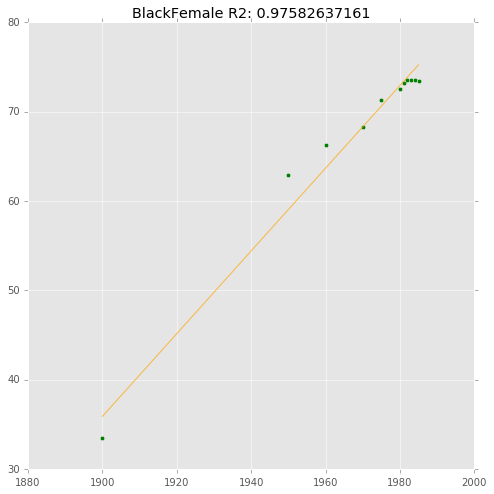

In [55]:
drawLine(model, X_train, y_train_bf, "BlackFemale")

In [56]:
print "Observed value (BlackFemale): ", X.loc[ X.Year == 2014, 'BlackFemale'].values[0]
print "Expected value (BlackFemale): ", model.predict(2014)[0]

Observed value (BlackFemale):  78.4
Expected value (BlackFemale):  88.6988993981


In [58]:
# TODO: Lastly, print out a correlation matrix for your entire
# dataset, and display a visualization of the correlation
# matrix, just as we described in the visualization section of
# the course
#
# .. your code here ..
X.corr() # For my testing

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
Year,1.000000,0.974154,0.913907,0.960635,0.940429
WhiteMale,0.974154,1.000000,0.975164,0.987974,0.985009
WhiteFemale,0.913907,0.975164,1.000000,0.956689,0.994656
BlackMale,0.960635,0.987974,0.956689,1.000000,0.975922
BlackFemale,0.940429,0.985009,0.994656,0.975922,1.000000


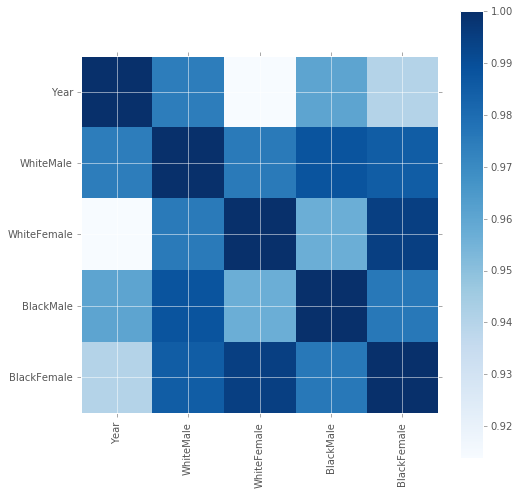

In [62]:
# correlation matrix
plt.imshow(X.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(X.columns))] 
plt.xticks(tick_marks, X.columns, rotation='vertical') 
plt.yticks(tick_marks, X.columns) 
plt.show()

* http://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html
* http://scikit-learn.org/stable/modules/covariance.html

In [ ]:
# INFO + HINT On Fitting, Scoring, and Predicting:
#
# Here's a hint to help you complete the assignment without pulling
# your hair out! When you use .fit(), .score(), and .predict() on
# your model, SciKit-Learn expects your training data to be in
# spreadsheet (2D Array-Like) form. This means you can't simply
# pass in a 1D Array (slice) and get away with it.
#
# To properly prep your data, you have to pass in a 2D Numpy Array,
# or a dataframe. But what happens if you really only want to pass
# in a single feature?
#
# If you slice your dataframe using df[['ColumnName']] syntax, the
# result that comes back is actually a *dataframe*. Go ahead and do
# a type() on it to check it out. Since it's already a dataframe,
# you're good -- no further changes needed.
#
# But if you slice your dataframe using the df.ColumnName syntax,
# OR if you call df['ColumnName'], the result that comes back is
# actually a series (1D Array)! This will cause SKLearn to bug out.
# So if you are slicing using either of those two techniques, before
# sending your training or testing data to .fit / .score, do a
# my_column = my_column.reshape(-1,1). This will convert your 1D
# array of [n_samples], to a 2D array shaped like [n_samples, 1].
# A single feature, with many samples.
#
# If you did something like my_column = [my_column], that would produce
# an array in the shape of [1, n_samples], which is incorrect because
# SKLearn expects your data to be arranged as [n_samples, n_features].
# Keep in mind, all of the above only relates to your "X" or input
# data, and does not apply to your "y" or labels.

### Lab Questions 5.8.

##### Q. Multiple Choice

(2 points possible)
##### Q5.8.1. Please enter a numeric value (e.g. 0, 1, 10.5, etc) which correctly answers the question(s) below:

Enter the 2014 life expectancy prediction for white males living within the U.S, using only data recorded prior to 1986:

<b>* My answer</b>: 80.8563542562 (<== <b>Correct!</b>)


##### Q5.8.2. Which relationship had the highest correlation?

- (A) BlackFemale and WhiteFemale
- (B) BlackFemale and WhiteMale
- (C) BlackMale and WhiteMale
- (D) BlackMale and WhiteFemale

<b>* My answer</b>: (A) BlackFemae & WhiteFemale(<== <b>Correct!</b>)

<b>* Explanation</b>: The hardest part of this lab is just the indexing. Make sure you take care of indexing properly, and after that, just read the note on the bottom of the document.

For correlation, the greatest / best relationship is the one closest to 1.0.

In [72]:
######################################################################

### Lab Assignment 5.9.

Continue your exploration of linear regression using a public dataset provided courtesy of [An Introduction to Statistical Learning](https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370/ref=sr_1_1?ie=UTF8&qid=1468723377&sr=8-1&keywords=An+Introduction+to+Statistical+Learning), called [College Acceptance and Enrollment](http://www-bcf.usc.edu/~gareth/ISL/data.html). There are four relationships we are interested in modeling:

- The amount charged for room and board, as a function of the number of: accepted students
- The number of enrolled students per college, as a function of the number of: accepted students
- The number of failed undergraduate students per college, as a function of: the number of accepted students
- The number of accepted students, as a function of: the amount charged for room and board, and the number of enrolled students.

You should be able to find these relationships given the dataset. Start by downloading the data directly [from this link](http://www-bcf.usc.edu/~gareth/ISL/College.csv), or through navigating the site linked above, and then complete the following actions:


1. Read through the /Module5/assignment9.py starter code file. It's pretty long, but there actually isn't much in terms of coding you have to do. The hard part is in understanding the material.
2. Load up the dataset, then use indexing to slice out the features of it we're interested in examining.
3. Split your data into training and testing.
4. Use the helper drawLine() and drawPlane() methods to display the results
5. Answer the following questions.

In [73]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%pylab inline
matplotlib.style.use('ggplot') # Look Pretty

Populating the interactive namespace from numpy and matplotlib


In [79]:
# TODO: First, as is your habit, inspect your dataset in a text
# editor, or spread sheet application. The first thing you should
# notice is that the first column is both unique (the name of each)
# college, as well as unlabeled. This is a HINT that it must be the
# index column. If you do not indicate to Pandas that you already
# have an index column, it'll create one for you, which would be
# undesirable since you already have one.
#
# Review the .read_csv() documentation and discern how to load up
# a dataframe while indicating which existing column is to be taken
# as an index. Then, load up the College dataset into a variable
# called X:
#
# .. your code here ..
college_df = pd.read_csv('Module5/Datasets/College.csv')
college_df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [81]:
X = pd.read_csv('Module5/Datasets/College.csv', index_col=0)
X.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [82]:
# INFO: This line isn't necessary for your purposes; but we'd just
# like to show you an additional way to encode features directly.
# The .map() method is like .apply(), but instead of taking in a
# lambda / function, you simply provide a mapping of keys:values.
# If you decide to embark on the "Data Scientist Challenge", this
# line of code will save you the trouble of converting it through
# other means:
X.Private = X.Private.map({'Yes':1, 'No':0})

In [83]:
X.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [85]:
X.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [89]:
X.dtypes

Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [91]:
X.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [84]:
# TODO: Create your linear regression model here and store it in a
# variable called 'model'. Don't actually train or do anything else
# with it yet:
#
# .. your code here ..
from sklearn import linear_model
model = linear_model.LinearRegression()

In [145]:
# INFO: The first relationship we're interested in is the amount
# charged for room and board, as a function of the number of
# accepted students. 

# TODO: Using indexing, create two slices (series). One will just
# store the room and board column, the other will store the accepted
# students column. Then use train_test_split to cut your data up
# into X_train, X_test, y_train, y_test, with a test_size of 30% and
# a random_state of 7.
#
# Since the objective is to model the amount charged for room and
# board as a function() of the number of accepted students, it should
# be clear to you that your output will be the room and board amount,
# and your input will be the accepted students amount.
#
# .. your code here ..
#s_room_board = X['Room.Board'].reshape(-1,1)
s_room_board = X['Room.Board']
s_room_board = s_room_board.to_frame()
s_accepted_students = X['Accept']

print s_room_board.head()
print 
print s_accepted_students.head()

                              Room.Board
Abilene Christian University        3300
Adelphi University                  6450
Adrian College                      3750
Agnes Scott College                 5450
Alaska Pacific University           4120

Abilene Christian University    1232
Adelphi University              1924
Adrian College                  1097
Agnes Scott College              349
Alaska Pacific University        146
Name: Accept, dtype: int64


In [146]:
print type(s_room_board), type(s_accepted_students)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [147]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(s_room_board, s_accepted_students, test_size=0.3, random_state=7)

In [148]:
# TODO: Fit and score your model appropriately. Store the score in the
# score variable.
#
# .. your code here ..
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
score = model.score(X_test, y_test)
print "score: ", score

score:  -0.00266698641455


In [150]:
def drawLine(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression line,
    # and displaying the R2 coefficient
    fig = plt.figure(figsize(8,8))
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print title
    print "Intercept(s): ", model.intercept_

    plt.show()

Accept(Room&Board) R2: -0.00266698641455
Intercept(s):  1340.61956519


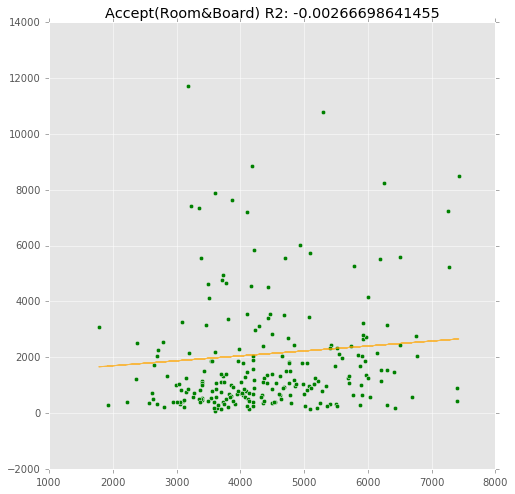

In [151]:
# INFO: We'll take it from here, buddy:
drawLine(model, X_test, y_test, "Accept(Room&Board)", score)

score:  0.857820486736
Accept(Enroll) R2: 0.857820486736
Intercept(s):  151.726112423


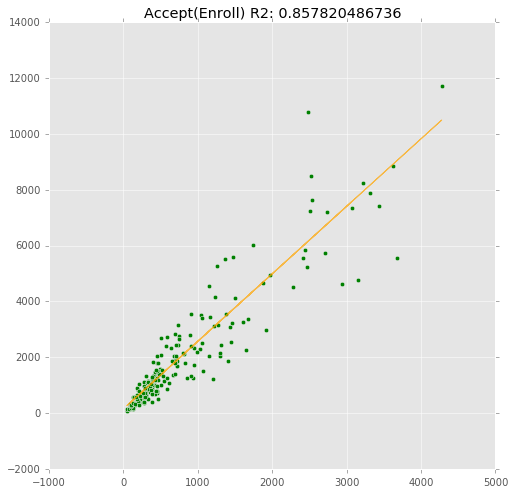

In [152]:
# TODO: Duplicate the process above; this time, model the number of
# enrolled students per college, as a function of the number of accepted
# students
#
# .. your code here ..
s_enroll = X['Enroll']
s_enroll = s_enroll.to_frame()

X_train, X_test, y_train, y_test = train_test_split(s_enroll, s_accepted_students, test_size=0.3, random_state=7)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print "score: ", score

drawLine(model, X_test, y_test, "Accept(Enroll)", score)

score:  0.777991797375
Accept(F.Undergrad) R2: 0.777991797375
Intercept(s):  380.942910498


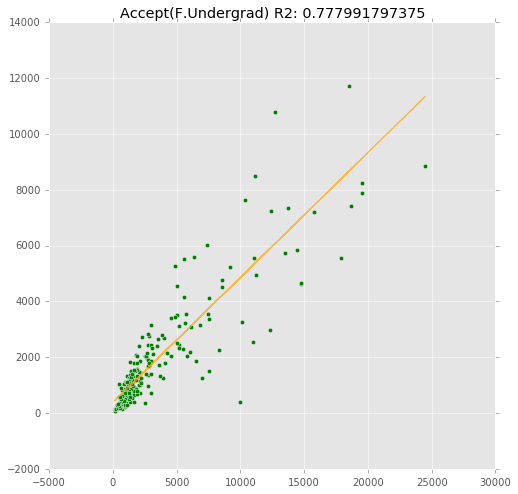

In [153]:
# TODO: Duplicate the process above; this time, model the number of
# failed undergraduate students per college, as a function of the number
# of accepted students
#
# .. your code here ..
s_f_under = X['F.Undergrad']
s_f_under = s_f_under.to_frame()

X_train, X_test, y_train, y_test = train_test_split(s_f_under, s_accepted_students, test_size=0.3, random_state=7)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print "score: ", score

drawLine(model, X_test, y_test, "Accept(F.Undergrad)", score)

In [154]:
def drawPlane(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression plane,
    # and displaying the R2 coefficient
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    # You might have passed in a DataFrame, a Series (slice),
    # an NDArray, or a Python List... so let's keep it simple:
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    # Set up a Grid. We could have predicted on the actual
    # col1, col2 values directly; but that would have generated
    # a mesh with WAY too fine a grid, which would have detracted
    # from the visualization
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    # Predict based on possible input values that span the domain
    # of the x and y inputs:
    z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
    z = z.reshape(x.shape)

    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print title
    print "Intercept(s): ", model.intercept_

    plt.show()


                              Enroll  Room.Board
Abilene Christian University     721        3300
Adelphi University               512        6450
Adrian College                   336        3750
Agnes Scott College              137        5450
Alaska Pacific University         55        4120 

score:  0.876437177421
Accept(Room&Board,Enroll) R2: 0.876437177421
Intercept(s):  -1176.62848249


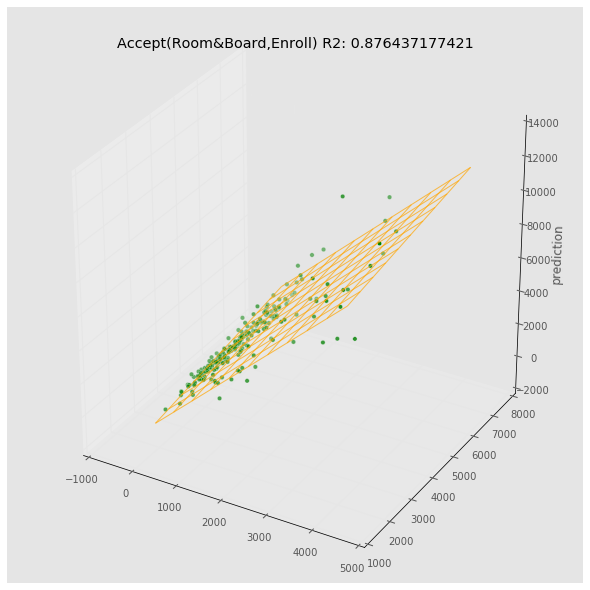

In [190]:
# TODO: Duplicate the process above (almost). This time is going to be
# a bit more complicated. Instead of modeling one feature as a function
# of another, you will attempt to do multivariate linear regression to
# model one feature as a function of TWO other features.
#
# Model the number of accepted students, as a function of the amount
# charged for room and board, AND the number of enrolled students. To do
# this, instead of creating a regular slice for a single-feature input,
# simply create a slice that contains both columns you wish to use as
# inputs. Your training labels will remain a single slice.
#
# .. your code here ..

s_roomboard_enroll = X[['Enroll', 'Room.Board']]
print s_roomboard_enroll.head(), "\n"

X_train, X_test, y_train, y_test = train_test_split(s_roomboard_enroll, s_accepted_students, test_size=0.3, random_state=7)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print "score: ", score

drawPlane(model, X_test, y_test, "Accept(Room&Board,Enroll)", score)

In [191]:
#
# INFO: That concludes this assignment
#

# INFO + HINT On Fitting, Scoring, and Predicting:
#
# Here's a hint to help you complete the assignment without pulling
# your hair out! When you use .fit(), .score(), and .predict() on
# your model, SciKit-Learn expects your training data to be in
# spreadsheet (2D Array-Like) form. This means you can't simply
# pass in a 1D Array (slice) and get away with it.
#
# To properly prep your data, you have to pass in a 2D Numpy Array,
# or a dataframe. But what happens if you really only want to pass
# in a single feature?
#
# If you slice your dataframe using df[['ColumnName']] syntax, the
# result that comes back is actually a *dataframe*. Go ahead and do
# a type() on it to check it out. Since it's already a dataframe,
# you're good -- no further changes needed.
#
# But if you slice your dataframe using the df.ColumnName syntax,
# OR if you call df['ColumnName'], the result that comes back is
# actually a series (1D Array)! This will cause SKLearn to bug out.
# So if you are slicing using either of those two techniques, before
# sending your training or testing data to .fit / .score, do a
# my_column = my_column.reshape(-1,1). This will convert your 1D
# array of [n_samples], to a 2D array shaped like [n_samples, 1].
# A single feature, with many samples.
#
# If you did something like my_column = [my_column], that would produce
# an array in the shape of [1, n_samples], which is incorrect because
# SKLearn expects your data to be arranged as [n_samples, n_features].
# Keep in mind, all of the above only relates to your "X" or input
# data, and does not apply to your "y" or labels.


In [ ]:
#
# Data Scientist Challenge
# ========================
#
# You've experimented with a number of feature scaling techniques
# already, such as MaxAbsScaler, MinMaxScaler, Normalizer, StandardScaler
# and more from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
# 
# What happens if you apply scaling to your data before doing 
# linear regression? Would it alter the quality of your results?
# Do the scalers that work on a per-feature basis, such as MinMaxScaler
# behave differently that those that work on a multi-feature basis, such
# as normalize? And moreover, once your features have been scaled, you
# won't be able to use the resulting regression directly... unless you're
# able to .inverse_transform() the scaling. Do all of the SciKit-Learn
# scalers support that?
#
# This is your time to shine and to show how much of an explorer you are:
# Dive deeper into uncharted lands, browse SciKit-Learn's documentation,
# scour Google, ask questions on Quora, Stack-Overflow, and the course
# message board, and see if you can discover something that will be of
# benefit to you in the future!


### Lab Questions 5.9.

##### Q. Which two relationships had the worst R2 correlations?

- (A) Accept x RoomBoard,Enroll --and-- Accept x Enroll
- (B) Accept x Enroll --and-- Accept x F.Undergrad
- (C) Accept x RoomBoard --and-- Accept x F.Undergrad correct
- (D) Accept x RoomBoard,Enroll --and-- Accept x RoomBoard

<b>* My answer</b>: (C) (<== <b>Correct!</b>)

<b>* Explanation</b>: The closer to zero the R2 coefficient is, the poorer the relationship is.
- (A) Accept x RoomBoard's R2: -0.00266698641455
- (B) Accept x F.Undergrad's R2: 0.777991797375
- (C) Accept x Enroll's R2: 0.857820486736
- (D) Accept x RoomBoard,Enroll's R2: 0.876437177421


In [ ]:
######################################################################